blockmean [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
blockmean [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
blockmean (gmtapi_init_grdheader): Please select compatible -R and -I values
blockmean [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
blockmean [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
blockmean (gmtapi_init_grdheader): Please select compatible -R and -I values
xyz2grd [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
xyz2grd [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
xyz2grd (gmtapi_init_grdheader): Please select compatible -R and -I values
xyz2grd [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.


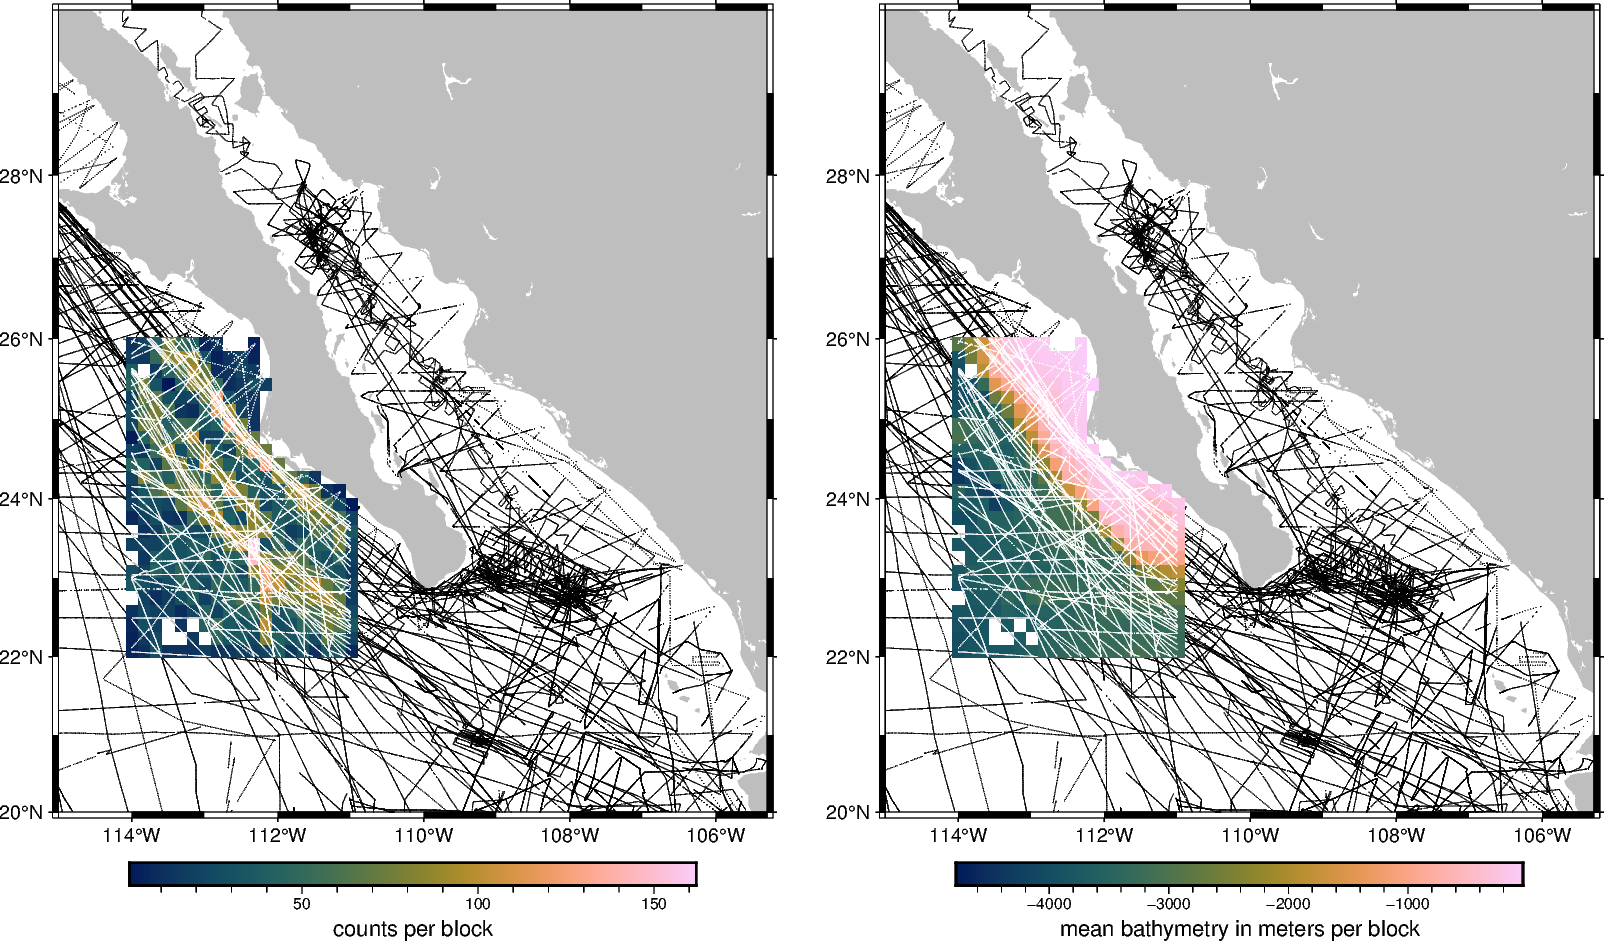

In [2]:
import pygmt

# Load sample dataset with bathymetry into pandas DataFrame
# Table of ship bathymetric observations off Baja California
df_bath = pygmt.datasets.load_sample_data("bathymetry")

# Get coordinates of study area
region_study = [
    min(df_bath.longitude),
    max(df_bath.longitude),
    min(df_bath.latitude),
    max(df_bath.latitude),
]

# Define subregion for further analysis
region_sel = [360 - 114, 360 - 111, 22, 26]

# Build subset based on subregion
df_bath_sel = pygmt.select(data=df_bath, region=region_sel)

# Define size of blocks used for the binning
block_size = "10m"  # arc-minutes

# Count data points within blocks of size 10 x 10 arc-minutes
df_bath_sel_count = pygmt.blockmean(
    data=df_bath_sel, spacing=block_size, region=region_study, summary="n"
)

# Calculate mean bathymetry within blocks of size 10 x 10 arc-minutes
df_bath_sel_mean = pygmt.blockmean(
    data=df_bath_sel, spacing=block_size, region=region_study
)

# Convert tabular data to GMT-ready grid
grd_bath_sel_count = pygmt.xyz2grd(
    data=df_bath_sel_count, region=region_study, spacing=block_size
)
grd_bath_sel_mean = pygmt.xyz2grd(
    data=df_bath_sel_mean, region=region_study, spacing=block_size
)


# Create figure object
fig = pygmt.Figure()

for block_value in ["counts", "mean bathymetry in meters"]:
    match block_value:
        case "counts":
            grd_block = grd_bath_sel_count
        case "mean bathymetry in meters":
            grd_block = grd_bath_sel_mean

    fig.coast(region=region_study, projection="M12c", land="gray", frame=True)

    # Plot all data points in black
    fig.plot(data=df_bath, style="p0.4p", fill="black")

    # Plot grid color-coded by number of data points within each block
    fig.grdimage(grid=grd_block, cmap="SCM/batlow", nan_transparent=True)
    # Add colorbar
    fig.colorbar(frame=f"x+l{block_value} per block")

    # Plot data points within subregion in white
    fig.plot(data=df_bath_sel, style="p0.4p", fill="white")

    # Shift plot origin to the right
    fig.shift_origin(xshift="w+2c")

fig.show(dpi=150)